# Lab 2: Data Processing

Some usefull links:

1. Python: https://www.python.org/downloads/

2. pip: 
    https://realpython.com/what-is-pip/ , 
    https://pip.pypa.io/en/stable/installation/ , 
    https://pip.pypa.io/en/stable/cli/pip_list/ 

3. Jupyter notebook: https://jupyter.org
       
4. Anaconda: https://www.anaconda.com/products/individual

5. vscode <> jupyter notebook: https://code.visualstudio.com/docs/datascience/jupyter-notebooks
---

Libraries: 

- Numpy https://numpy.org 
- Pandas https://pandas.pydata.org 
- Scikit-learn https://scikit-learn.org/stable/ 
- matplotlib https://matplotlib.org 
- plotly https://plotly.com/python/


## General imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

Airbnb dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 

In [2]:
airbnb_ori = pd.read_csv('AB_NYC_2019.csv')
airbnb = airbnb_ori.copy()

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Data cleaning 

### Visualize missing values

In [5]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(airbnb)

name => 16
host_name => 21
last_review => 10052
reviews_per_month => 10052


In [6]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(airbnb)

name => 0.03%
host_name => 0.04%
last_review => 20.56%
reviews_per_month => 20.56%


In [7]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
airbnb.isnull().sum()/airbnb.count()

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000430
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.258785
reviews_per_month                 0.258785
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Pandas package has many useful biilt-in methods that make coding easier.

In [9]:
# Exclude not useful columns
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

<Axes: >

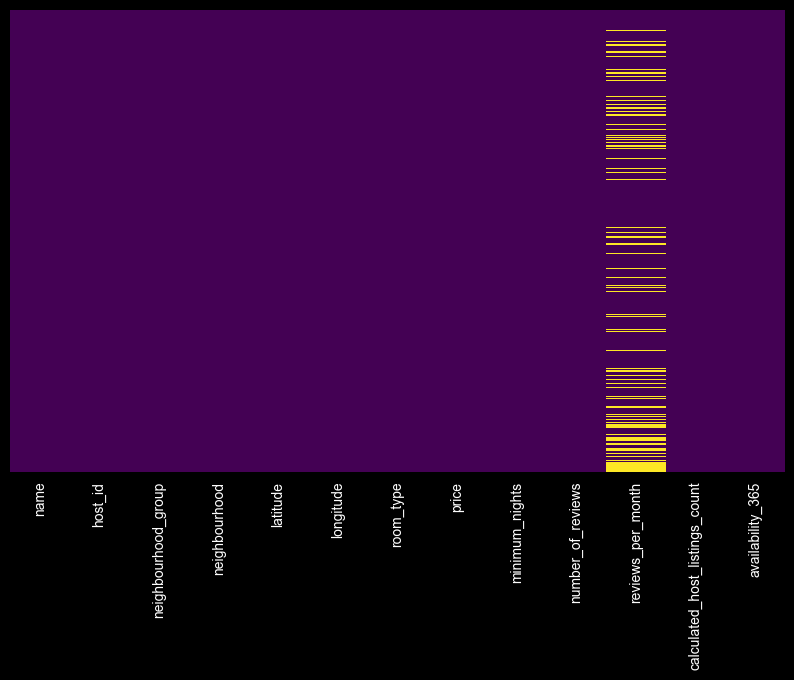

In [10]:
# visualize null values
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [11]:
# Creating a mask
mask = airbnb['name'].isnull()
# Applying and vizualizing mask 
airbnb_null_names = airbnb[mask]
airbnb_null_names

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2854,NaN,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,1,362
3703,NaN,11395220,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,0.45,1,341
5775,NaN,20700823,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,0.02,1,0
5975,NaN,22686810,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,0.09,1,0
6269,NaN,21600904,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,1,0
6567,NaN,1832442,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,1,0
6605,NaN,24625694,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,1,0
8841,NaN,31147528,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,1,0
11963,NaN,33377685,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,0.02,1,0
12824,NaN,50448556,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,5,0


### Simple imputation strategies

In [12]:
################ imputing with fillna from the pandas library
# imputing with mean
reviews_per_month_mean_value = round(airbnb['reviews_per_month'].mean(), 2)
airbnb['reviews_per_month'].fillna(reviews_per_month_mean_value, inplace=True)

# imputing with median
reviews_per_month_median_value = round(airbnb['reviews_per_month'].median(), 2)
airbnb['reviews_per_month'].fillna(reviews_per_month_median_value, inplace=True)

# replace null values with specific value
airbnb.fillna({'reviews_per_month':0}, inplace=True)

# for other strategies: check ffill, bfill or interpolate from the pandas library

################ imputing with SimpleImputor from the sklearn library

from sklearn.impute import SimpleImputer
# define the imputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median

airbnb[['reviews_per_month']] = imr.fit_transform(airbnb[['reviews_per_month']])

# use strategy = 'most_frequent' for categorical data

# for other strategies: check KNNImputer and other from the sklearn library

C:\Users\Christian M\AppData\Local\Temp\ipykernel_19952\790043619.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['reviews_per_month'].fillna(reviews_per_month_mean_value, inplace=True)
C:\Users\Christian M\AppData\Local\Temp\ipykernel_19952\790043619.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [13]:
airbnb.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [14]:
# remove rows with missing values
airbnb_drop = airbnb.dropna()
airbnb_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48879 non-null  int64  
 2   neighbourhood_group             48879 non-null  object 
 3   neighbourhood                   48879 non-null  object 
 4   latitude                        48879 non-null  float64
 5   longitude                       48879 non-null  float64
 6   room_type                       48879 non-null  object 
 7   price                           48879 non-null  int64  
 8   minimum_nights                  48879 non-null  int64  
 9   number_of_reviews               48879 non-null  int64  
 10  reviews_per_month               48879 non-null  float64
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                48879

<Axes: >

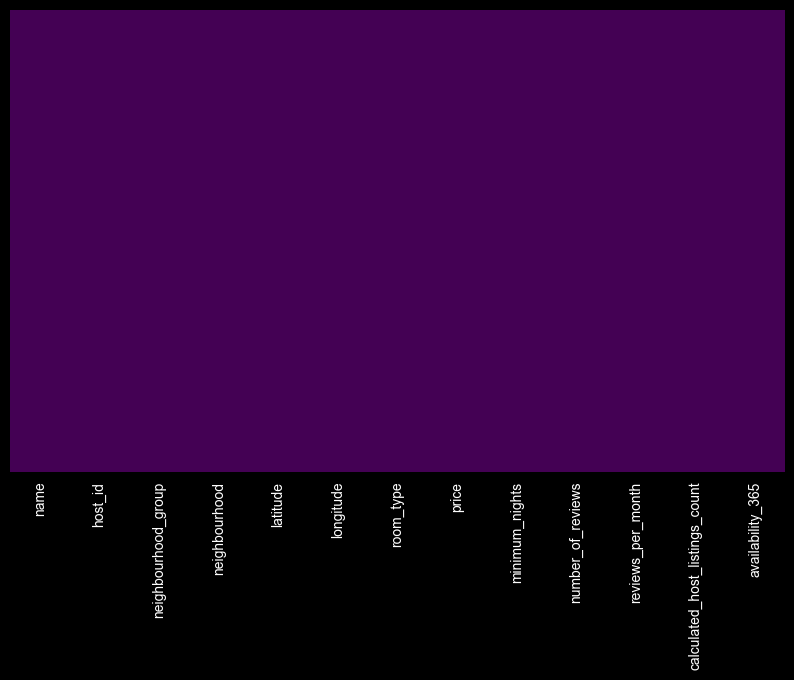

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb.isnull(), yticklabels=False, cmap='viridis', cbar=False)

### Multivariate imputation

Imputing the missing values based on the other variables

Rain in australia dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

In [17]:
# Reading in the data and selecting the continous features cont_feats
df = pd.read_csv('weatherAUS.csv')
cont_feats = [col for col in df.columns if df[col].dtype != object]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [18]:
perc_missing(df)

MinTemp => 1.02%
MaxTemp => 0.87%
Rainfall => 2.24%
Evaporation => 43.17%
Sunshine => 48.01%
WindGustDir => 7.1%
WindGustSpeed => 7.06%
WindDir9am => 7.26%
WindDir3pm => 2.91%
WindSpeed9am => 1.21%
WindSpeed3pm => 2.11%
Humidity9am => 1.82%
Humidity3pm => 3.1%
Pressure9am => 10.36%
Pressure3pm => 10.33%
Cloud9am => 38.42%
Cloud3pm => 40.81%
Temp9am => 1.21%
Temp3pm => 2.48%
RainToday => 2.24%
RainTomorrow => 2.25%


<Axes: >

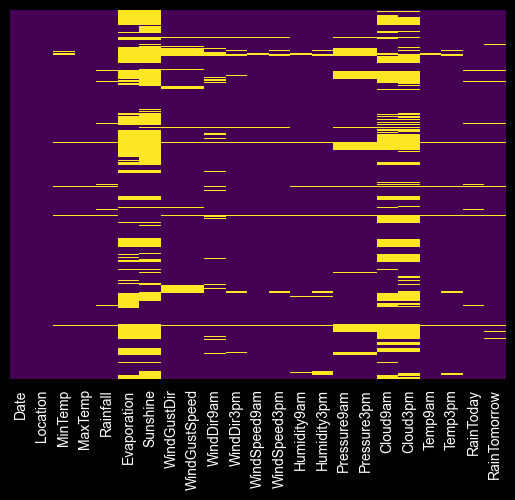

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [20]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
mean_imputed = mean_imputer.fit_transform(df[cont_feats])
df_mean_imputed = pd.DataFrame(mean_imputed, columns=cont_feats)

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
median_imputed = median_imputer.fit_transform(df[cont_feats])
df_median_imputed = pd.DataFrame(median_imputed, columns=cont_feats)

# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(df[cont_feats])
df_iter_imputed = pd.DataFrame(iter_imputed, columns=cont_feats)

C:\Users\Christian M\PycharmProjects\Labb1\.venv\Lib\site-packages\sklearn\impute\_iterative.py:867: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


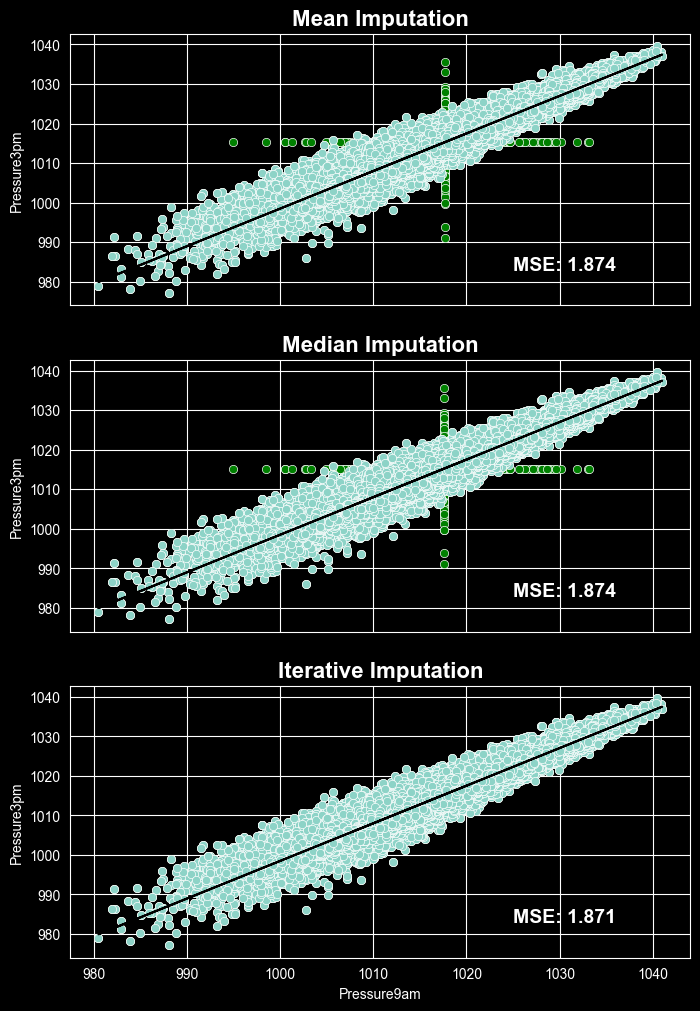

In [22]:
# Plotting a comparison between the different strategies
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 12))
axes = np.reshape(axes, -1)

dfs_imputed = [df_mean_imputed, df_median_imputed, df_iter_imputed]
titles = ['Mean Imputation', 'Median Imputation', 'Iterative Imputation']

for i, df_imputed in enumerate(dfs_imputed):
    # Plotting the imputed values
    sns.scatterplot(data=df_imputed,x=df_imputed.Pressure9am,y=df_imputed.Pressure3pm, ax=axes[i], color='green')
    # Plotting the data
    sns.scatterplot(data=df,x=df.Pressure9am,y=df.Pressure3pm, ax=axes[i])
    
    # Fitting and plotting a linear regression line
    x=df_imputed.Pressure9am
    y=df_imputed.Pressure3pm
    m, b = np.polyfit(x, y, 1)
    linreg = m*x + b
    axes[i].plot(x, linreg, color='black')
    
    # Setting the titles and including the RMSE values
    axes[i].set_title(titles[i], fontsize=16, fontweight='bold')
    #rmse = round(mean_squared_error(y, linreg, squared=False), 3)
    rmse = round(np.sqrt(mean_squared_error(y, linreg)), 3)
    axes[i].text(1025, 983, f'MSE: {rmse}', fontsize=14, fontweight='bold')

## Data transformation

### Standardisation

Standardization centers the data so that every column has a mean of zero and unit variance. This process is sensitive to outliers in the dataset. 

In [23]:
#Create a new data frame 
df = pd.DataFrame({'y': [8, 12, 15, 14, 19, 23, 25, 29],
                   'x1': [5, 7, 7, 9, 12, 9, 9, 4],
                   'x2': [11, 8, 10, 6, 6, 5, 9, 12],
                   'x3': [2, 2, 3, 2, 5, 5, 7, 9]})

#view data frame
df

,y,x1,x2,x3
0,8,5,11,2
1,12,7,8,2
2,15,7,10,3
3,14,9,6,2
4,19,12,6,5
5,23,9,5,5
6,25,9,9,7
7,29,4,12,9


In [24]:
df.describe()

,y,x1,x2,x3
count,8.000000,8.00000,8.000000,8.000000
mean,18.125000,7.75000,8.375000,4.375000
std,7.140178,2.54951,2.559994,2.615203
min,8.000000,4.00000,5.000000,2.000000
25%,13.500000,6.50000,6.000000,2.000000
50%,17.000000,8.00000,8.500000,4.000000
75%,23.500000,9.00000,10.250000,5.500000
max,29.000000,12.00000,12.000000,9.000000


In [25]:
#standardize the values in each column
df_new = (df-df.mean())/df.std()

#view new data frame
df_new

,y,x1,x2,x3
0,-1.418032,-1.078639,1.025393,-0.908151
1,-0.857822,-0.294174,-0.146485,-0.908151
2,-0.437664,-0.294174,0.634767,-0.525772
3,-0.577717,0.490290,-0.927736,-0.908151
4,0.122546,1.666987,-0.927736,0.238987
5,0.682756,0.490290,-1.318362,0.238987
6,0.962861,0.490290,0.244141,1.003746
7,1.523071,-1.470871,1.416019,1.768505


In [26]:
df_new.describe()

,y,x1,x2,x3
count,8.000000,8.000000e+00,8.000000e+00,8.000000e+00
mean,0.000000,2.775558e-17,-4.163336e-17,5.551115e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.418032,-1.470871e+00,-1.318362e+00,-9.081514e-01
25%,-0.647743,-4.902903e-01,-9.277364e-01,-9.081514e-01
50%,-0.157559,9.805807e-02,4.882823e-02,-1.433923e-01
75%,0.752782,4.902903e-01,7.324235e-01,4.301770e-01
max,1.523071,1.666987e+00,1.416019e+00,1.768505e+00


In [27]:
# using StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
  
# define standard scaler 
scaler = StandardScaler() 
  
# transform data 
df_new = pd.DataFrame(scaler.fit_transform(df))
df_new.describe()

,0,1,2,3
count,8.000000,8.000000e+00,8.000000,8.000000
mean,0.000000,2.775558e-17,0.000000,0.000000
std,1.069045,1.069045e+00,1.069045,1.069045
min,-1.515940,-1.572427e+00,-1.409389,-0.970855
25%,-0.692466,-5.241424e-01,-0.991792,-0.970855
50%,-0.168438,1.048285e-01,0.052200,-0.153293
75%,0.804758,5.241424e-01,0.782994,0.459879
max,1.628232,1.782084e+00,1.513788,1.890612


Coming back to airnbnb dataframe:

In [28]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.372559,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
airbnb[("price")] = (airbnb[("price")] - airbnb[("price")].mean()) / airbnb[("price")].std() 
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,3.255171e-17,7.029962,23.274466,1.372559,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,1.000000e+00,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,-6.359277e-01,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,-3.486123e-01,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,-1.945446e-01,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,9.277088e-02,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,4.100399e+01,1250.000000,629.000000,58.500000,327.000000,365.000000


### Normalisation 

Normalization: Normalization is a process of scaling input vectors individually to the unit norm (magnitude of one) and is applied on records (rows/vectors). 

L1 (manhattan distance or taxicab distance): A sum of absolute values of components of vector. A most natural way of measuring distance between vectors.

L2 (euclidean distance): A distance of the vector coordinate from the origin of the vector space. Definition of vector magnitude.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/1920px-Manhattan_distance.svg.png" width="200">
</div>
In taxicab geometry, the lengths of the red, blue, green, and yellow paths all equal 12, the taxicab distance between the opposite corners, and all four paths are shortest paths. Instead, in Euclidean geometry, the red, blue, and yellow paths still have length 12 but the green path is the unique shortest path, with length equal to the Euclidean distance between the opposite corners, 6√2 ≈ 8.49.

Source: [wikipedia](https://en.wikipedia.org/wiki/Taxicab_geometry#/media/File:Manhattan_distance.svg)


In [30]:
airbnb[("reviews_per_month")].describe()

count    48895.000000
mean         1.372559
std          1.497775
min          0.010000
25%          0.280000
50%          1.220000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

In [31]:
#L1 scaling 
airbnb_norm1  = airbnb[("reviews_per_month")]/np.linalg.norm(airbnb[("reviews_per_month")],ord =1)
airbnb_norm1.describe()

count    4.889500e+04
mean     2.045199e-05
std      2.231779e-05
min      1.490062e-07
25%      4.172175e-06
50%      1.817876e-05
75%      2.354299e-05
max      8.716865e-04
Name: reviews_per_month, dtype: float64

In [32]:
#L2 scaling 
airbnb_norm2  = airbnb[("reviews_per_month")]/np.linalg.norm(airbnb[("reviews_per_month")],ord =2)
airbnb_norm2.describe()

count    48895.000000
mean         0.003055
std          0.003334
min          0.000022
25%          0.000623
50%          0.002716
75%          0.003517
max          0.130225
Name: reviews_per_month, dtype: float64

Standardization centers data around a mean of zero and a standard deviation of one, while normalization scales data to a set range, often [0, 1], by using the minimum and maximum values.

Additional reading : [the-effect-of-standardization-on-pca-in-a-pattern-classification-task](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#the-effect-of-standardization-on-pca-in-a-pattern-classification-task)

## Data reduction 

Data reduction refers to compacting the storage space required for data and improving its efficiency through summarizing while decreasing data complexity and retaining its inbuilt characteristics. 

### Load dataset

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

Diabetes dataframe: https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [34]:
data = pd.read_csv("diabetes.csv", header=None)
data

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       769 non-null    object
 1   1       769 non-null    object
 2   2       769 non-null    object
 3   3       769 non-null    object
 4   4       769 non-null    object
 5   5       769 non-null    object
 6   6       769 non-null    object
 7   7       769 non-null    object
 8   8       769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [36]:
# retrieve numpy array
dataset = data.values

# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

In [37]:
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (515, 8) (515,)
Test (254, 8) (254,)


### Filter methods

#### ANOVA (Analysis of Variance)
It looks across multiple groups of populations and compares the means/averages of these populations to produce one score and one significance value indicating how different these populations are.

Feature 0: 21.952926
Feature 1: 134.995132
Feature 2: 1.868609
Feature 3: 2.141532
Feature 4: 6.303769
Feature 5: 41.691993
Feature 6: 11.759834
Feature 7: 26.831139


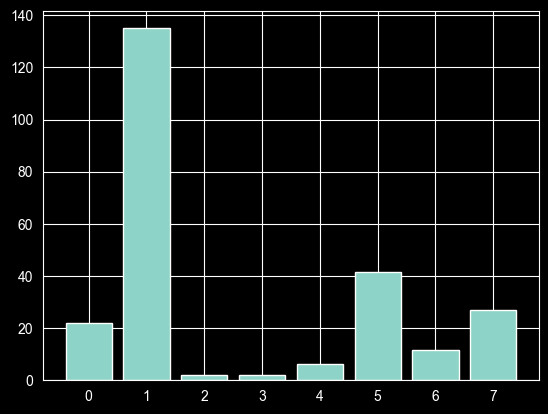

In [38]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Information Gain 
It calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

Feature 0: 0.026945
Feature 1: 0.121680
Feature 2: 0.022277
Feature 3: 0.032731
Feature 4: 0.065657
Feature 5: 0.049276
Feature 6: 0.013382
Feature 7: 0.061868


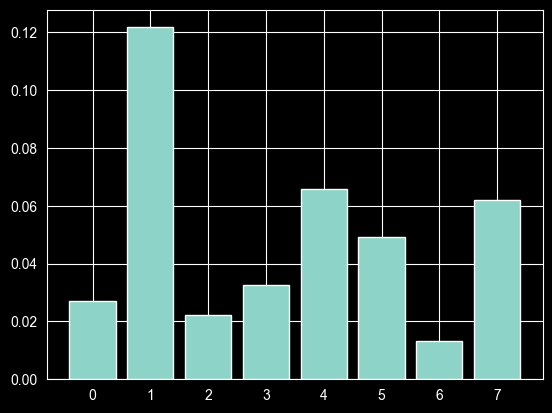

In [39]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Correlation
It is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target.  
Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [41]:
data = pd.read_csv('breast_cancer.csv')
data = data.iloc[:,1:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<Axes: >

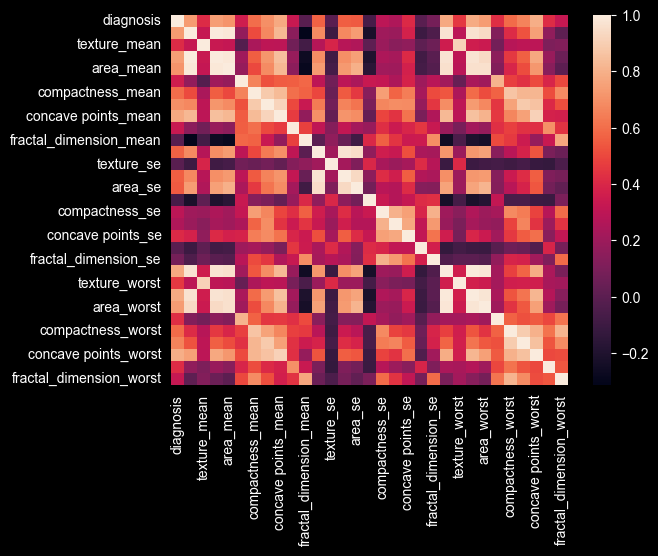

In [42]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

corr = data.corr()
sns.heatmap(corr)

In [43]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data_corr = data[selected_columns]
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   compactness_mean         569 non-null    float64
 5   concavity_mean           569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_se                569 non-null    float64
 9   texture_se               569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  compactness_se           569 non-null    float64
 12  concavity_se             569 non-null    float64
 13  concave points_se        569 non-null    float64
 14  symmetry_se              5